In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msn
import math
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
os.listdir('dateset')

['creditcard.csv', 'details.txt']

In [4]:
df = pd.read_csv('dateset\creditcard.csv')

# EDA

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
null_count = df.isnull().sum().sum()

print(f'Ümumi null dəyərlərin sayı : {null_count}')

Ümumi null dəyərlərin sayı : 0


In [8]:


print(f"Fraud olaraq bilinən əməliyyatların faizi :{round(df['Class'].value_counts(normalize = True).values[1] *100, 2)}%\nFraud olmayan əməliyyatların faizi : {round(df['Class'].value_counts(normalize = True).values[0] *100, 2)}%")

Fraud olaraq bilinən əməliyyatların faizi :0.17%
Fraud olmayan əməliyyatların faizi : 99.83%


C:\Users\Cavidan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


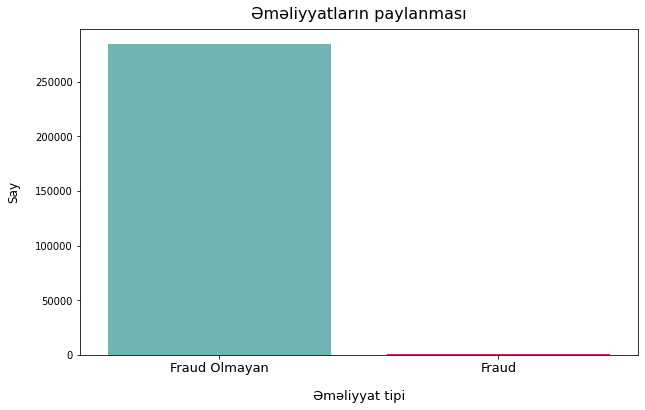

In [9]:
colors = ["#66BFBF", "#FF0063"]
plt.figure(figsize=(10,6))
sns.countplot('Class', data=df, palette=colors)
plt.xlabel('Əməliyyat tipi', fontsize = 13,  labelpad = 15)
#plt.xticks(labels = ['Fraud Olmayan', 'Fraud'])
plt.title('Əməliyyatların paylanması', fontsize=16, pad = 10)
locs, labels = plt.xticks()
plt.xticks(locs, ['Fraud Olmayan', 'Fraud'], fontsize = 13)
plt.ylabel("Say", fontsize = 12,  labelpad = 15)
plt.show()


C:\Users\Cavidan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


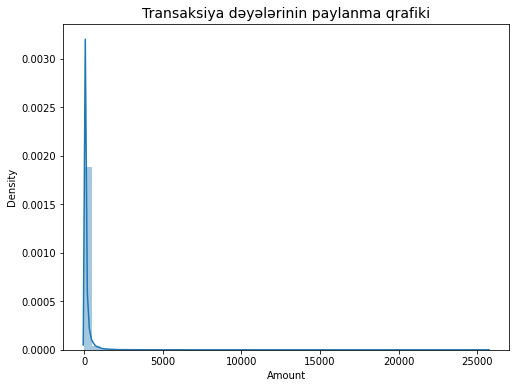

In [10]:
plt.figure(figsize=(8,6))
plt.title('Transaksiya dəyələrinin paylanma qrafiki', fontsize=14)
sns.distplot(df['Amount'], bins=50)
plt.show()


C:\Users\Cavidan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Cavidan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


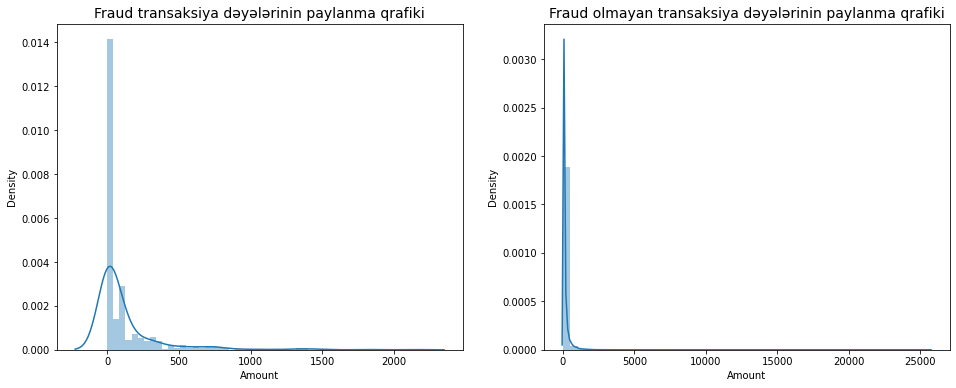

In [11]:
fig, ax = plt.subplots(ncols = 2, figsize=(16,6))


sns.distplot(df[df['Class'] == 1]['Amount'], bins=50, ax=ax[0])
sns.distplot(df[df['Class'] == 0]['Amount'], bins=50, ax=ax[1])

ax[0].set_title("Fraud transaksiya dəyələrinin paylanma qrafiki", fontsize=14)
ax[1].set_title("Fraud olmayan transaksiya dəyələrinin paylanma qrafiki", fontsize=14)

plt.show()

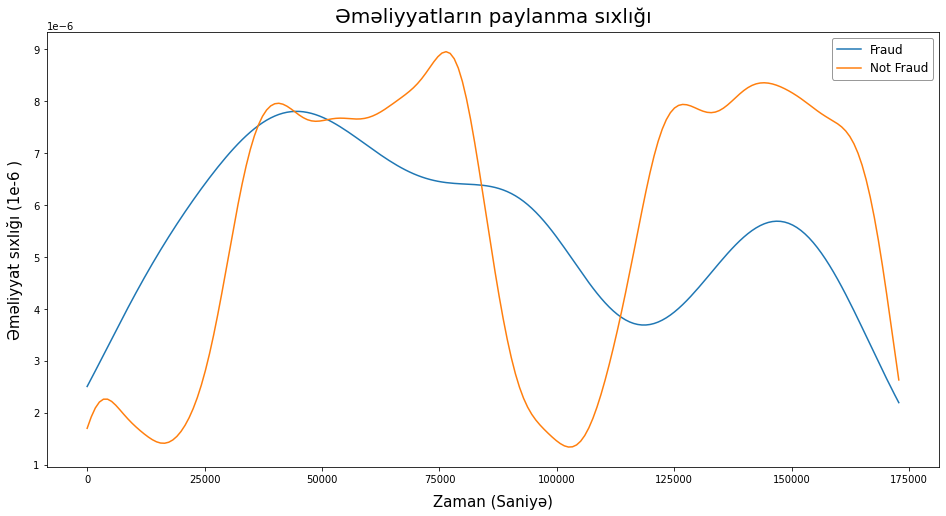

In [12]:
fraud_op = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]
fig, ax = plt.subplots(figsize = (16,8))
sns.kdeplot(data = df[df['Class'] == 1], x = 'Time', ax = ax, label = 'Fraud',  clip =  (0.0, df['Time'].max()))
sns.kdeplot(data = df[df['Class'] == 0], x = 'Time', ax = ax, label = 'Not Fraud', clip =  (0.0, df['Time'].max()))
plt.title('Əməliyyatların paylanma sıxlığı', fontsize = 20, pad = 10)
plt.xlabel('Zaman (Saniyə)',fontsize = 15, labelpad = 10)
plt.ylabel('Əməliyyat sıxlığı (1e-6 )',fontsize = 15, labelpad = 10)

plt.legend(fontsize = 12, borderpad = 0.4, edgecolor = 'grey')
plt.show()

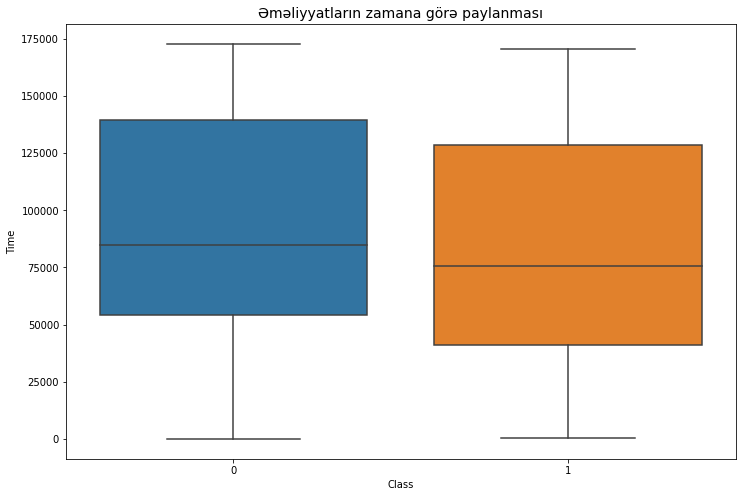

In [13]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='Class', y='Time',data = df)

# Change the appearance of that box
#ax.artists[0].set_facecolor('#90EE90')
#ax.artists[1].set_facecolor('#FA8072')

plt.title('Əməliyyatların zamana görə paylanması', fontsize = 14)
plt.show()

In [14]:
copy_df = df.copy()

In [15]:
copy_df['Hour'] = copy_df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = copy_df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
stat_df= pd.DataFrame(tmp)
stat_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
stat_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [16]:
def plot_statistically(data, col_name, color_1, color_2, title):
    fig, ax = plt.subplots(ncols=2, figsize=(18,6))
    s = sns.lineplot( x="Hour", y=col_name, data=data.loc[data.Class==0], ax = ax[0], color = color_1)
    s = sns.lineplot( x="Hour", y=col_name, data=data.loc[data.Class==1], ax = ax[1], color = color_2)
    plt.suptitle(title, fontsize = 20 )
    ax[0].set_title('Normal', fontsize = 15)
    ax[1].set_title("Fraud", fontsize = 15)
    ax[0].set_ylabel(None )
    ax[1].set_ylabel(None )
    
    
    return plt.show()
    
    

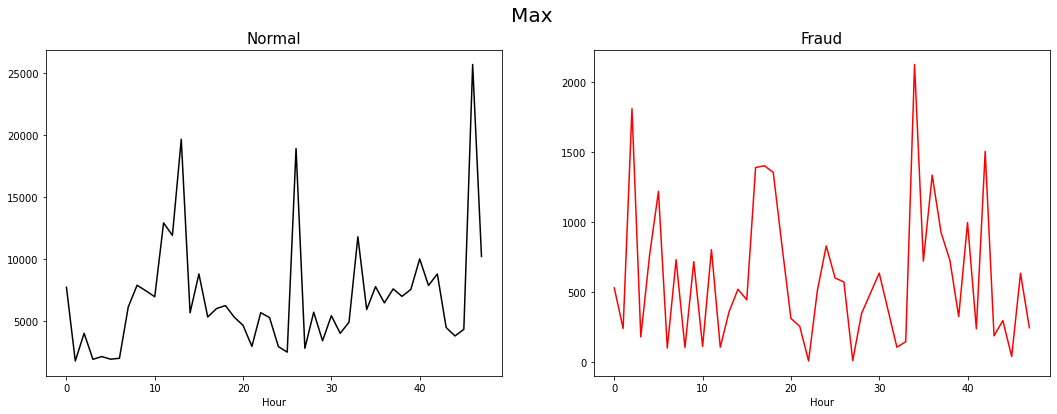

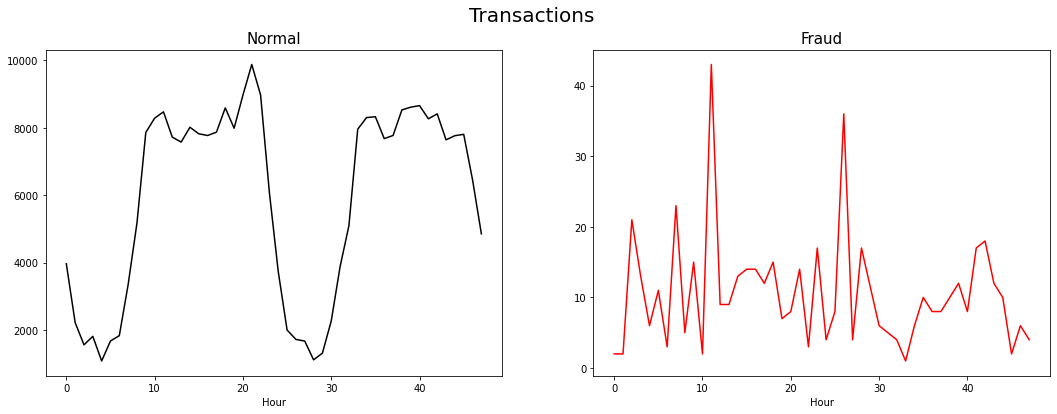

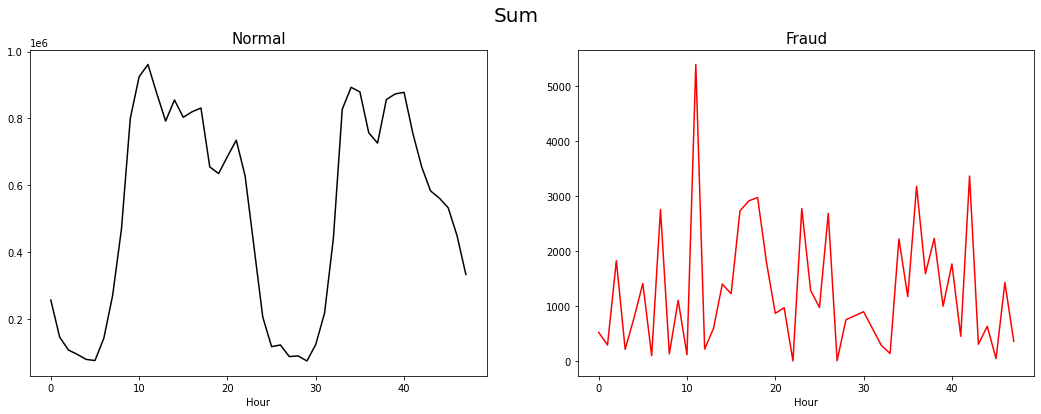

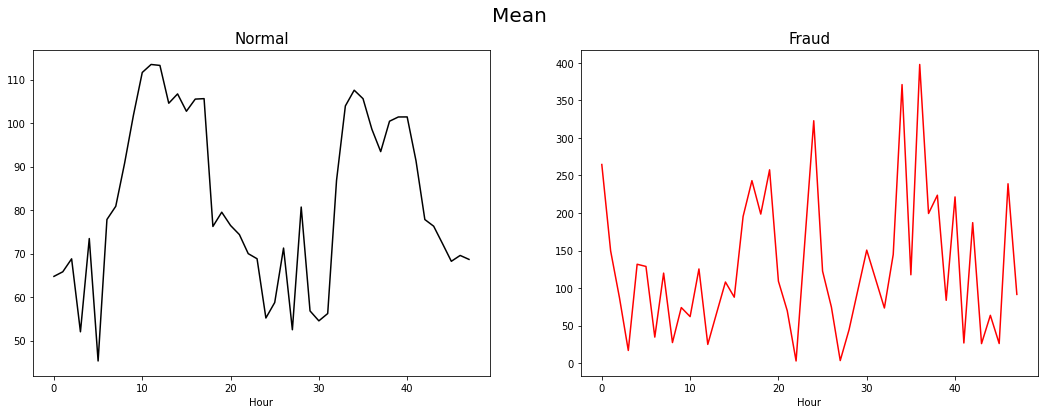

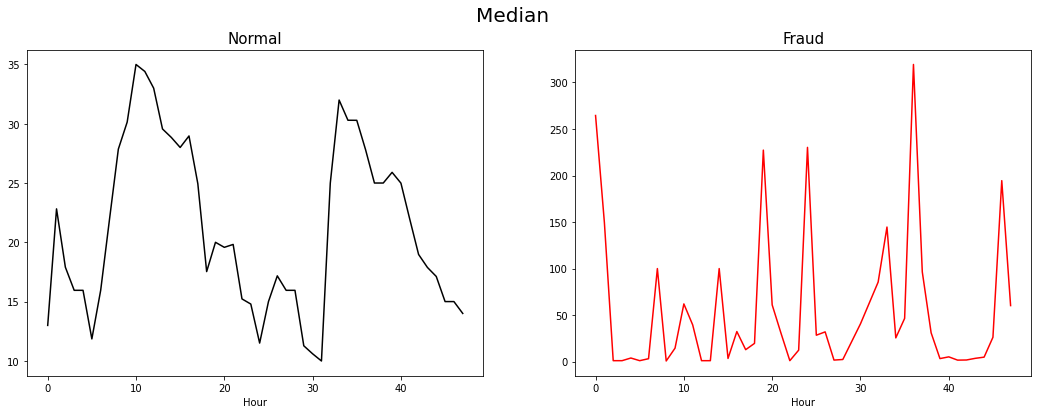

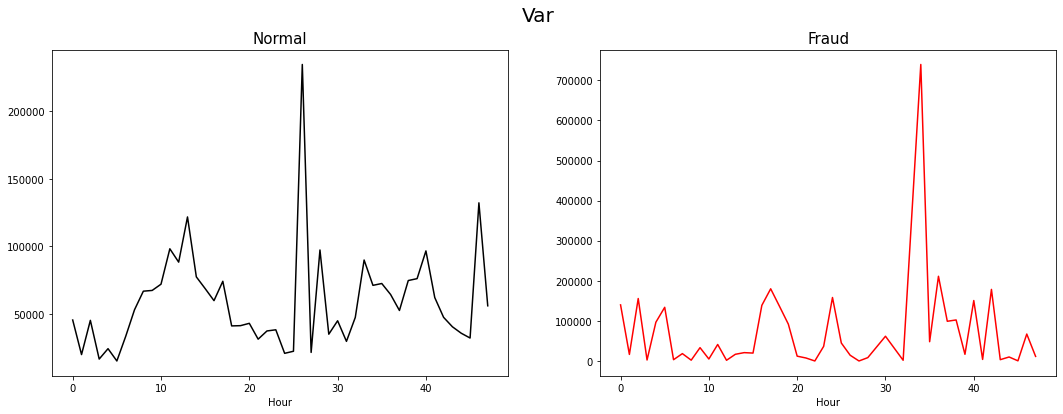

In [17]:
for col in stat_df.columns[3:]:
    my_pl = plot_statistically(stat_df, col, 'black', 'red', col)
    

In [18]:
stat_df.columns[2:]

Index(['Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var'], dtype='object')

# Feature Engineering

In [20]:
df['Time'] = df['Time'].apply(lambda sec : (sec/3600))

In [21]:
df['Hour'] = df['Time']%24   
df['Hour'] = df['Hour'].apply(lambda x : int(x))

In [22]:
df['Day'] = df['Time']/24  
df['Day'] = df['Day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [23]:
df[['Time', 'Hour', 'Day', "Amount"]]

,Time,Hour,Day,Amount
0,0.000000,0,1,149.62
1,0.000000,0,1,2.69
2,0.000278,0,1,378.66
3,0.000278,0,1,123.50
4,0.000556,0,1,69.99
...,...,...,...,...
284802,47.996111,23,2,0.77
284803,47.996389,23,2,24.79
284804,47.996667,23,2,67.88
284805,47.996667,23,2,10.00


In [24]:
# calculating fraud transaction daywise
dayFrdTran = df[(df['Class'] == 1)]['Day'].value_counts()

# calculating genuine transaction daywise
dayGenuTran = df[(df['Class'] == 0)]['Day'].value_counts()

# calculating total transaction daywise
dayTran = df['Day'].value_counts()

print("Ümumi Gündəlik transaksiya sayları:")
print(dayTran)

print("\n")

print("Gündəlik fraud transaksiya sayları:")
print(dayFrdTran)

print("\n")

print("Gündəlik normal transaksiya sayları:")
print(dayGenuTran)

print("\n")

print("Gündəlik fraud əməliyyatların faizi:")
print((dayFrdTran/dayTran)*100)

print("\n")

print("Fraud əməliyyatların gündəllik paylanma  faizi:")
print((dayFrdTran/ dayFrdTran.sum()) * 100)

Ümumi Gündəlik transaksiya sayları:
1    144787
2    140020
Name: Day, dtype: int64


Gündəlik fraud transaksiya sayları:
1    281
2    211
Name: Day, dtype: int64


Gündəlik normal transaksiya sayları:
1    144506
2    139809
Name: Day, dtype: int64


Gündəlik fraud əməliyyatların faizi:
1    0.194078
2    0.150693
Name: Day, dtype: float64


Fraud əməliyyatların gündəllik paylanma  faizi:
1    57.113821
2    42.886179
Name: Day, dtype: float64


In [25]:
dayFrdTran/ dayFrdTran.sum()

1    0.571138
2    0.428862
Name: Day, dtype: float64

In [26]:
"""explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax = plt.subplots(nrows = 3,figsize = (16,15))

plot_daily_pie(ax[0], dayTran, 'Gündəlik ümumi transaksiyaların paylanması')

plot_daily_pie(ax[1], dayFrdTran, 'Gündəlik fraud transaksiyaların paylanması')
plot_daily_pie(ax[2], dayGenuTran, 'Gündəlik normal transaksiyaların paylanması')

"""

'explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. \'Hogs\')\n\nfig1, ax = plt.subplots(nrows = 3,figsize = (16,15))\n\nplot_daily_pie(ax[0], dayTran, \'Gündəlik ümumi transaksiyaların paylanması\')\n\nplot_daily_pie(ax[1], dayFrdTran, \'Gündəlik fraud transaksiyaların paylanması\')\nplot_daily_pie(ax[2], dayGenuTran, \'Gündəlik normal transaksiyaların paylanması\')\n\n'

In [27]:
def plot_daily_pie(ax, data, title,label = ['Birinci Gün', 'Ikinci Gün'], explodes = [0, 0.1]):
    
    ax.pie(data, explode = explodes, labels = label, autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.set_title(title, fontsize = 14)
    
    

# Scaling Amount

<h3> Loqarifmasını taparaqdan scale </h3>

In [28]:
df['amount_log'] = np.log(df['Amount'] + 0.0001)

<h3> Standard Scaling methodun istifadə edərəkdən  scale</h3>

<p>$$ z = \frac{x_i - \mu}{\sigma} $$ </p>

In [29]:
ss = StandardScaler()
df['amount_sta_scaled'] = ss.fit_transform(df['Amount'].values.reshape(-1,1))

<h3> Normal (MinMax) Scaling methodun istifadə edərəkdən  scale</h3>

$$ x_{norm} = \frac{x_i - x_{min}}{x_{max}-x_{min}} $$

In [30]:
mm = MinMaxScaler()
df['amount_mm_scaled'] =  mm.fit_transform(df['Amount'].values.reshape(-1,1))

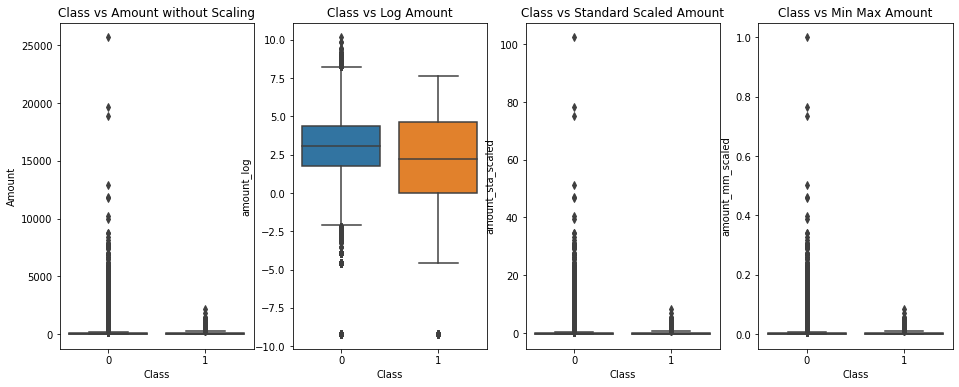

In [31]:
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,6))

sns.boxplot(x ="Class",y="Amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount without Scaling")

sns.boxplot(x ="Class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="Class",y="amount_sta_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Standard Scaled Amount")

sns.boxplot(x ="Class",y="amount_mm_scaled",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

In [139]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Day', 'amount_log', 'amount_sta_scaled',
       'amount_mm_scaled'],
      dtype='object')

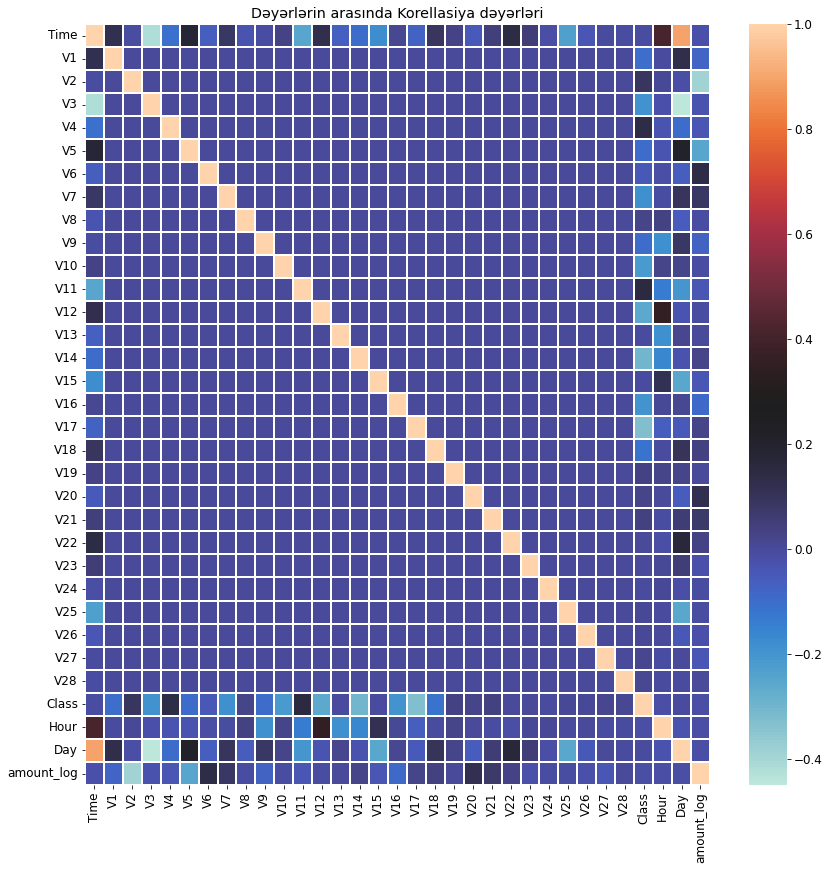

In [148]:
plt.figure(figsize = (14,14))
plt.title('Dəyərlərin arasında Korellasiya dəyərləri')
corr = df.drop(['Amount', 'amount_sta_scaled', 'amount_mm_scaled'], axis = 1).corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1, cmap = 'icefire')
plt.show()

#### Amount və v2, v5 low correlation,  v7 və v20 ilə high correlation
#### Class və v17, v14 arasıdnda low correlation , 

# Model Preperation

In [32]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Hour', 'Day', 'amount_log', 'amount_sta_scaled',
       'amount_mm_scaled'],
      dtype='object')

In [33]:
df.drop(['Time', 'Class','Day', 'Hour', 'Amount','amount_sta_scaled', 'amount_mm_scaled'], axis = 1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008099
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.989578
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936639
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816242
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.261235
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210444
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217743
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.302595


In [34]:
X = df.drop(['Time', 'Class','Day', 'Hour', 'Amount','amount_sta_scaled', 'amount_mm_scaled'], axis = 1)
y = df['Class']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Undersampling

In [36]:
from imblearn.under_sampling import RandomUnderSampler

In [37]:
us = RandomUnderSampler(random_state = 42)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)

In [38]:
print(y_train_us.value_counts(), y_train.value_counts())

0    356
1    356
Name: Class, dtype: int64 0    199008
1       356
Name: Class, dtype: int64


# Oversampling 

In [39]:
from imblearn.over_sampling import RandomOverSampler

In [40]:
os = RandomOverSampler(random_state = 42)
X_train_os, y_train_os = os.fit_resample(X_train, y_train)

In [41]:
print(y_train_os.value_counts(), y_train.value_counts())

0    199008
1    199008
Name: Class, dtype: int64 0    199008
1       356
Name: Class, dtype: int64


# SMOTE

In [42]:
from imblearn.over_sampling import SMOTE, ADASYN

In [43]:
smo = SMOTE(random_state = 42)
X_train_smo, y_train_smo  = smo.fit_resample(X_train, y_train)

In [44]:
print(y_train_smo.value_counts(), y_train.value_counts())

0    199008
1    199008
Name: Class, dtype: int64 0    199008
1       356
Name: Class, dtype: int64


# ADASYN

In [45]:
from imblearn.over_sampling import ADASYN

In [46]:
ada = ADASYN(random_state = 42)
X_train_ada, y_train_ada  = ada.fit_resample(X_train, y_train)

In [47]:
print(y_train_ada.value_counts(), y_train.value_counts())

1    199021
0    199008
Name: Class, dtype: int64 0    199008
1       356
Name: Class, dtype: int64


In [48]:
methods_samples = {'Normal':[X_train, y_train],
                   'Undersampling' :[X_train_us, y_train_us], 
                   'Oversampling' : [X_train_os, y_train_os],
                   'SMOTE' : [X_train_smo, y_train_smo],
                   'ADASYN' : [X_train_ada, y_train_ada]}

# Machine Learning Models

In [49]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve

In [66]:
def plot_confmatrix(ax, y_test, y_pred, labels = ['Normal','Fraudulent']):
    cnf_matrix = confusion_matrix(y_test , y_pred)
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap="winter" ,fmt='g', yticklabels=labels, xticklabels=labels, ax = ax )

    ax.set_title('Confusion matrix', y=1.1, fontsize = 22)
    ax.set_ylabel('Actual',fontsize = 18)
    ax.set_xlabel('Predicted',fontsize = 18)




In [65]:
def plot_roc(ax,y_test, y_pred):

    fpr, tpr, thresholds = roc_curve(y_test, y_pred)

    auc = roc_auc_score(y_test, y_pred)

    ax.plot(fpr,tpr,linewidth=2, label=f"data 1, auc = {auc}")
    ax.legend(loc=4)

    ax.plot([0,1], [0,1], 'k--' )

    plt.rcParams['font.size'] = 12
    ax.set_title('ROC Curve ', y=1.1, fontsize = 22)
    ax.set_xlabel('False Positive Rate (1 - Specificity)')
    ax.set_ylabel('True Positive Rate (Sensitivity)')


In [78]:
def get_metrics(y_test, y_pred):
    
    return {
            "Accuracy": accuracy_score(y_pred , y_test),
            "AUC" : roc_auc_score(y_test , y_pred),
            "Precision" : precision_score(y_test , y_pred),
            "Recall" : recall_score(y_test , y_pred),
            "F1" : f1_score(y_test , y_pred)
           }

In [68]:
def plot_graphs(y_test, y_pred, name):
    fig, ax = plt.subplots(ncols = 2, figsize = (13.5,6))
    plot_roc(ax[0], y_test, y_pred)
    plot_confmatrix(ax[1], y_test, y_pred)
    fig.suptitle(name, fontsize = 25, y = 1.18)
    plt.show()
    

In [70]:
data = get_metrics(y_test, y_pred)

Accuracy : 0.9976475545100242
AUC : 0.9400921515991723
Precision : 0.39344262295081966
Recall : 0.8823529411764706
F1 : 0.54421768707483


0.54421768707483

In [83]:
models_metrics_saver = []

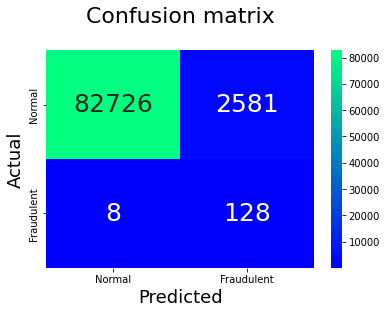

In [83]:
#plot_confmatrix(y_test , y_pred)

**There are 88 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.**

**True Negative** - 82726 (truely saying negative - genuine transaction correctly identified as genuine)

**True Postive** - 128 (truely saying positive - fraud transaction correctly identified as fraud)

**False Negative** - 8 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

**False Positive** - 2581 ( falsely saying positive - genuine transaction incorrectly identified as fraud)

## Random Forest (Error)

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for name, train_val in methods_samples.items():
    temp_rf = RandomForestClassifier()
    temp_rf.fit(train_val[0], train_val[1])
    y_pred = temp_df.predict(X_test)
    
    print(f'Accuracy : {accuracy_score(y_pred , y_test)}') 
    print(f'AUC : {roc_auc_score(y_test , y_pred)}')
    print(f'Precision : {precision_score(y_test , y_pred)}')
    print(f'Recall : {recall_score(y_test , y_pred)}')
    print(f'F1 : {f1_score(y_test , y_pred)}')
    
    print(f'\n\n{'-' * 80}') 

In [ ]:
temp_rf = RandomForestClassifier()
temp_rf.fit(X_train, y_train)
y_pred = temp_df.predict(X_test)
    
print(f'Accuracy : {accuracy_score(y_pred , y_test)}') 

In [59]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

In [51]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step

In [56]:
X_train.shape

(199364, 29)

## GBM

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
for name, train_val in methods_samples.items():
    tmp_model_metrics = []
    tmp_gbm = GradientBoostingClassifier()
    tmp_gbm.fit(train_val[0], train_val[1])
    y_pred = tmp_gbm.predict(X_test)
     
    
    
    tmp_data = get_metrics(y_test , y_pred)
    
    
    print('\n'.join([f"{name} : {score}"for name, score in tmp_data.items()]))
    plot_graphs(y_test, y_pred, f'GBM  model used by {name}')
    
    
    tmp_model_metrics.append('GBM')
    tmp_model_metrics.append(name)

    tmp_model_metrics.extend(list(tmp_data.values()))
    print(tmp_model_metrics)
    models_metrics_saver.append(tmp_model_metrics)
    
    print(f'\n\n\n{"-" * 100}')
    

KeyboardInterrupt: 

## XGBoost

In [119]:
from xgboost import XGBClassifier


In [75]:
print('\n'.join([f"{name} : {score}"for name, score in data.items()]))

Accuracy : 0.9976475545100242
AUC : 0.9400921515991723
Precision : 0.39344262295081966
Recall : 0.8823529411764706
F1 : 0.54421768707483


Accuracy : 0.9996722961506501
AUC : 0.9190824799564756
Precision : 0.95
Recall : 0.8382352941176471
F1 : 0.890625


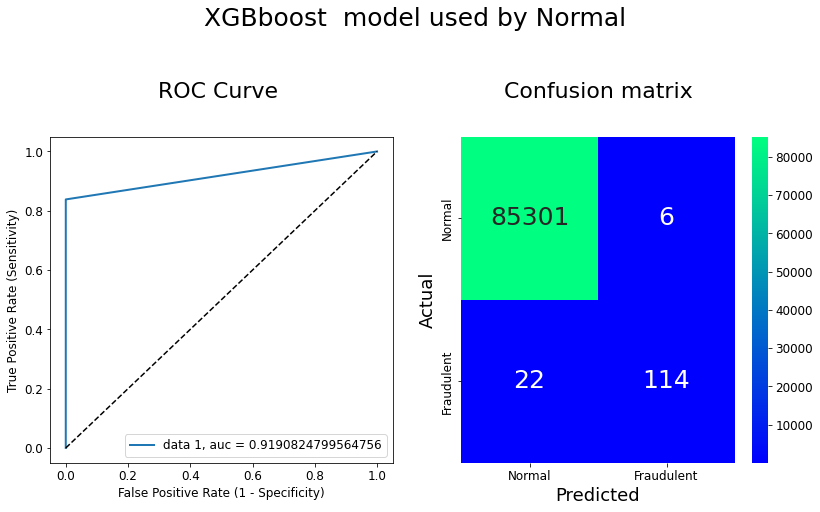

['XGBboost', 0.9996722961506501, 0.9190824799564756, 0.95, 0.8382352941176471, 0.890625]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9632503540371944
AUC : 0.9522310078684667
Precision : 0.0392638036809816
Recall : 0.9411764705882353
F1 : 0.07538280329799765


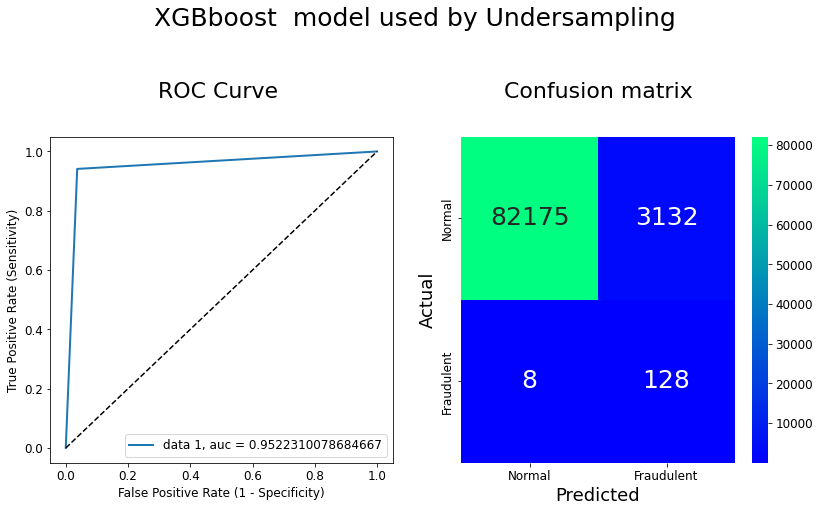

['XGBboost', 0.9632503540371944, 0.9522310078684667, 0.0392638036809816, 0.9411764705882353, 0.07538280329799765]



----------------------------------------------------------------------------------------------------
Accuracy : 0.999602073897218
AUC : 0.9263885316631488
Precision : 0.8923076923076924
Recall : 0.8529411764705882
F1 : 0.8721804511278195


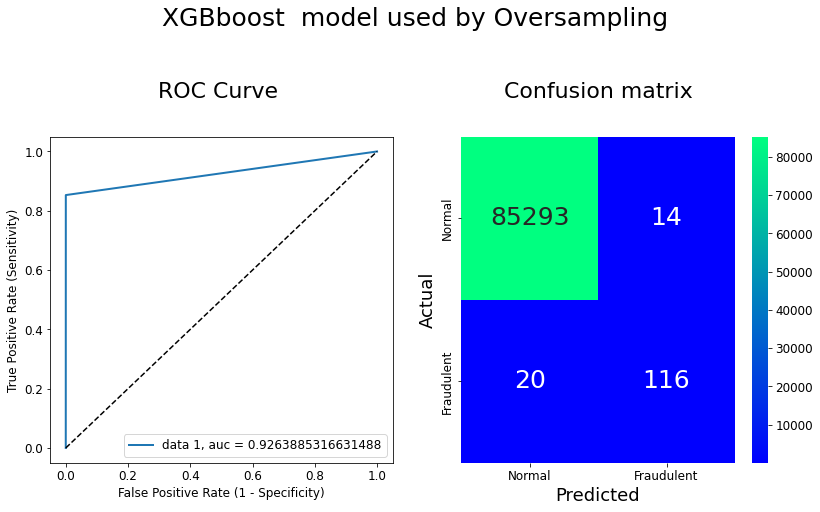

['XGBboost', 0.999602073897218, 0.9263885316631488, 0.8923076923076924, 0.8529411764705882, 0.8721804511278195]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9993328885923949
AUC : 0.9446067714600347
Precision : 0.7423312883435583
Recall : 0.8897058823529411
F1 : 0.8093645484949833


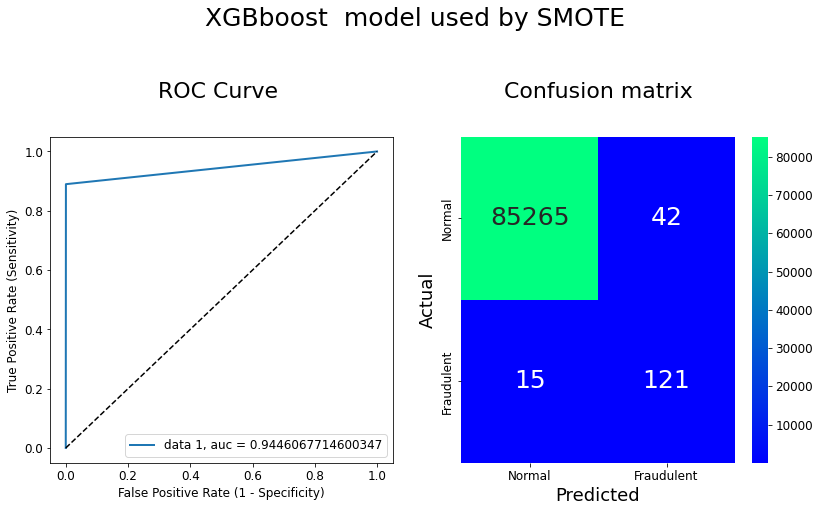

['XGBboost', 0.9993328885923949, 0.9446067714600347, 0.7423312883435583, 0.8897058823529411, 0.8093645484949833]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9991924440855307
AUC : 0.9335246090418068
Precision : 0.6982248520710059
Recall : 0.8676470588235294
F1 : 0.7737704918032787


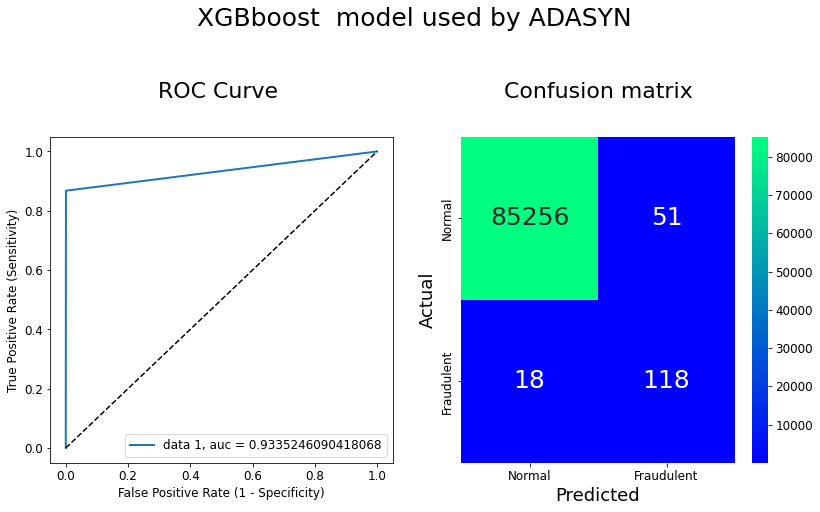

['XGBboost', 0.9991924440855307, 0.9335246090418068, 0.6982248520710059, 0.8676470588235294, 0.7737704918032787]



----------------------------------------------------------------------------------------------------


In [120]:
for name, train_val in methods_samples.items():
    tmp_model_metrics = []
    tmp_xgb = XGBClassifier()
    tmp_xgb.fit(train_val[0], train_val[1])
    y_pred = tmp_xgb.predict(X_test)
     
    
    
    tmp_data = get_metrics(y_test , y_pred)
    
    
    print('\n'.join([f"{name} : {score}"for name, score in tmp_data.items()]))
    plot_graphs(y_test, y_pred, f'XGBboost  model used by {name}')
    
    
    tmp_model_metrics.append('XGBboost')
    tmp_model_metrics.append(name)
    tmp_model_metrics.extend(list(tmp_data.values()))
    print(tmp_model_metrics)
    models_metrics_saver.append(tmp_model_metrics)
    
    print(f'\n\n\n{"-" * 100}')

In [123]:
models_metrics_saver = []

## LightGBM

In [58]:
from lightgbm import LGBMClassifier

Accuracy : 0.9989700736163291
AUC : 0.9077189807194637
Precision : 0.6379310344827587
Recall : 0.8161764705882353
F1 : 0.7161290322580646


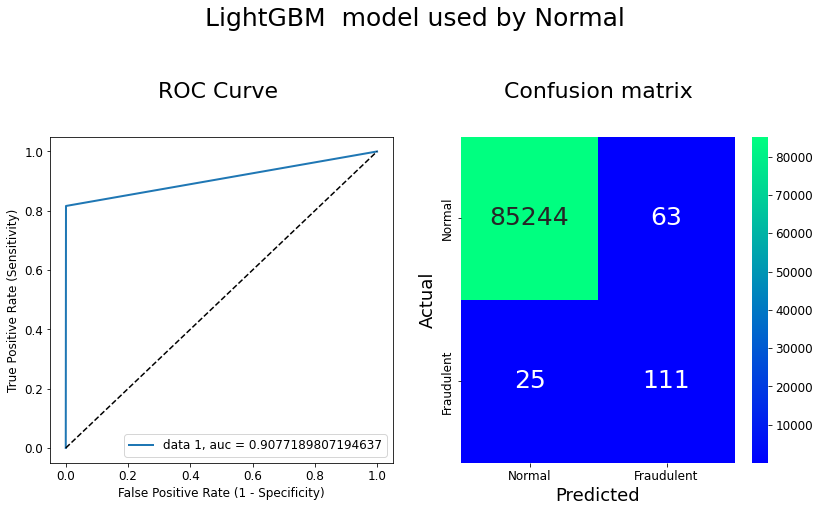

['LightGBM', 'Normal', 0.9989700736163291, 0.9077189807194637, 0.6379310344827587, 0.8161764705882353, 0.7161290322580646]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9633907985440586
AUC : 0.9523013420731627
Precision : 0.03940886699507389
Recall : 0.9411764705882353
F1 : 0.0756501182033097


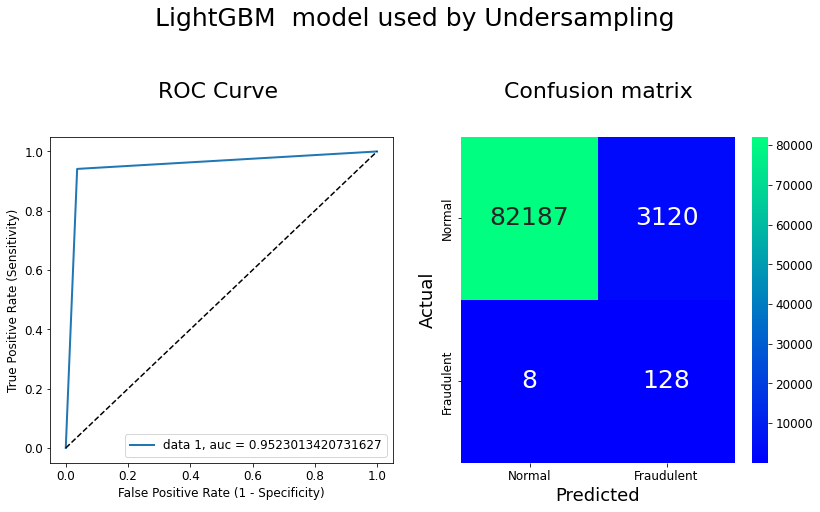

['LightGBM', 'Undersampling', 0.9633907985440586, 0.9523013420731627, 0.03940886699507389, 0.9411764705882353, 0.0756501182033097]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9994850368081645
AUC : 0.9300005292304128
Precision : 0.823943661971831
Recall : 0.8602941176470589
F1 : 0.8417266187050361


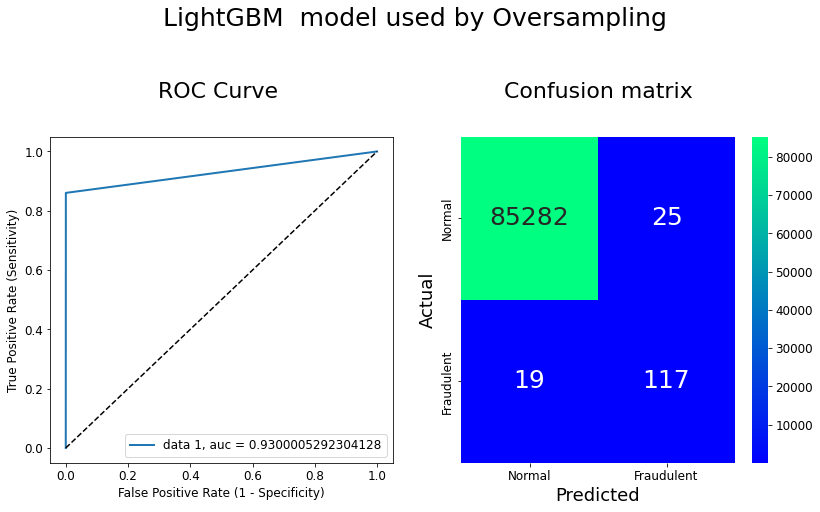

['LightGBM', 'Oversampling', 0.9994850368081645, 0.9300005292304128, 0.823943661971831, 0.8602941176470589, 0.8417266187050361]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9984317030066828
AUC : 0.9368142415042142
Precision : 0.5042372881355932
Recall : 0.875
F1 : 0.6397849462365591


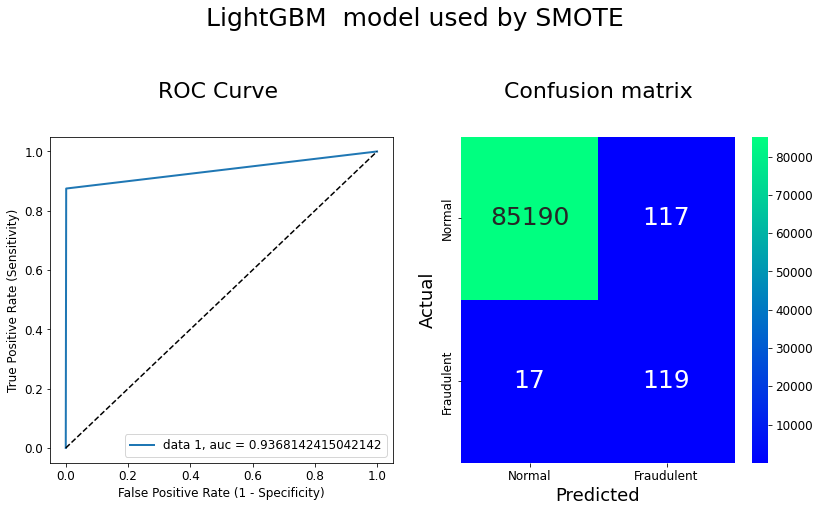

['LightGBM', 'SMOTE', 0.9984317030066828, 0.9368142415042142, 0.5042372881355932, 0.875, 0.6397849462365591]



----------------------------------------------------------------------------------------------------
Accuracy : 0.9976475545100242
AUC : 0.9400921515991723
Precision : 0.39344262295081966
Recall : 0.8823529411764706
F1 : 0.54421768707483


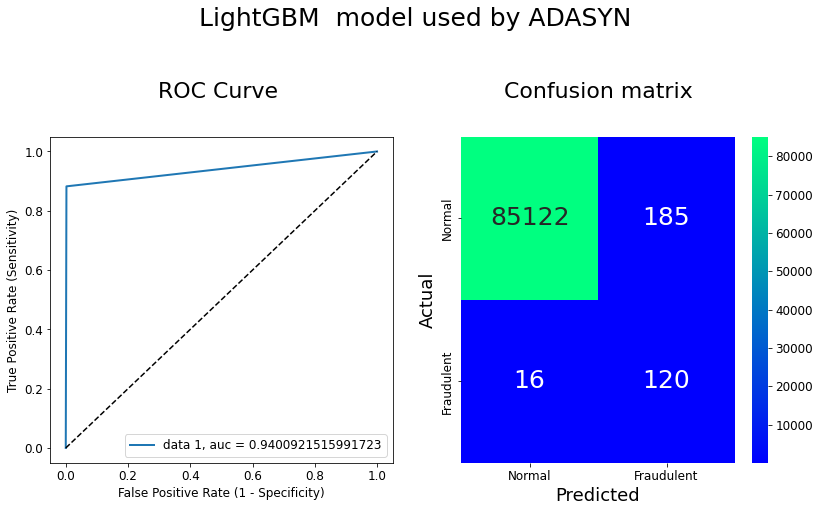

['LightGBM', 'ADASYN', 0.9976475545100242, 0.9400921515991723, 0.39344262295081966, 0.8823529411764706, 0.54421768707483]



----------------------------------------------------------------------------------------------------


In [124]:
for name, train_val in methods_samples.items():
    tmp_model_metrics = []
    tmp_lgbm = LGBMClassifier()
    tmp_lgbm.fit(train_val[0], train_val[1])
    y_pred = tmp_lgbm.predict(X_test)
     
    
    
    tmp_data = get_metrics(y_test , y_pred)
    
    
    print('\n'.join([f"{name} : {score}"for name, score in tmp_data.items()]))
    plot_graphs(y_test, y_pred, f'LightGBM  model used by {name}')
    
    
    tmp_model_metrics.append('LightGBM')
    tmp_model_metrics.append(name)

    tmp_model_metrics.extend(list(tmp_data.values()))
    print(tmp_model_metrics)
    models_metrics_saver.append(tmp_model_metrics)
    
    print(f'\n\n\n{"-" * 100}')

In [128]:
ml_model_res = pd.DataFrame(data = models_metrics_saver, columns = ['Model_Name', 'Sampling_Method', 'Accuracy', 'AUC', 'Precision', 'Recall', 'F1_score'])

In [129]:
ml_model_res

,Model_Name,Sampling_Method,Accuracy,AUC,Precision,Recall,F1_score
0,LightGBM,Normal,0.998970,0.907719,0.637931,0.816176,0.716129
1,LightGBM,Undersampling,0.963391,0.952301,0.039409,0.941176,0.075650
2,LightGBM,Oversampling,0.999485,0.930001,0.823944,0.860294,0.841727
3,LightGBM,SMOTE,0.998432,0.936814,0.504237,0.875000,0.639785
4,LightGBM,ADASYN,0.997648,0.940092,0.393443,0.882353,0.544218


# Tuning models (Not finished)

In [131]:
from sklearn.model_selection import GridSearchCV

## LightGBM Tuning 

In [133]:
parameters = {'num_leaves':[20,40], 'min_child_samples':[5,10],'max_depth':[-1,5,10],
             'learning_rate':[0.05,0.1,0.2],'reg_alpha':[0,0.01,0.03]}

In [135]:
clf=GridSearchCV(tmp_lgbm,parameters,scoring='accuracy')
clf.fit(X=X_train, y=y_train)
print(clf.best_params_)
predicted=clf.predict(X_test)
print('Classification of the result is:')
print(accuracy_score(Y_test, predicted))
end = time.time()
print('Execution time is:')
print(end - start)

KeyboardInterrupt: 